<a href="https://colab.research.google.com/github/Hamza-t/Data-Mining-labs/blob/main/unsupervised_learning_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libreries
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#import data
fromage = pd.read_table(r"fromage1.txt",sep="\t",header=0,index_col=0)
print(fromage.describe())

         calories      sodium     calcium  ...  proteines  cholesterol  magnesium
count   29.000000   29.000000   29.000000  ...  29.000000    29.000000  29.000000
mean   300.034483  210.086207  185.734483  ...  20.168966    74.586207  26.965517
std     91.914356  108.678923   72.528882  ...   6.959788    28.245755  11.318388
min     70.000000   22.000000   72.600000  ...   4.100000    10.000000  10.000000
25%    292.000000  140.000000  132.900000  ...  17.800000    70.000000  20.000000
50%    321.000000  223.000000  202.300000  ...  21.000000    80.000000  26.000000
75%    355.000000  276.000000  220.500000  ...  23.400000    90.000000  30.000000
max    406.000000  432.000000  334.600000  ...  35.700000   120.000000  51.000000

[8 rows x 9 columns]


In [ ]:
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [ ]:
fromage.columns

Index(['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates',
       'proteines', 'cholesterol', 'magnesium'],
      dtype='object')

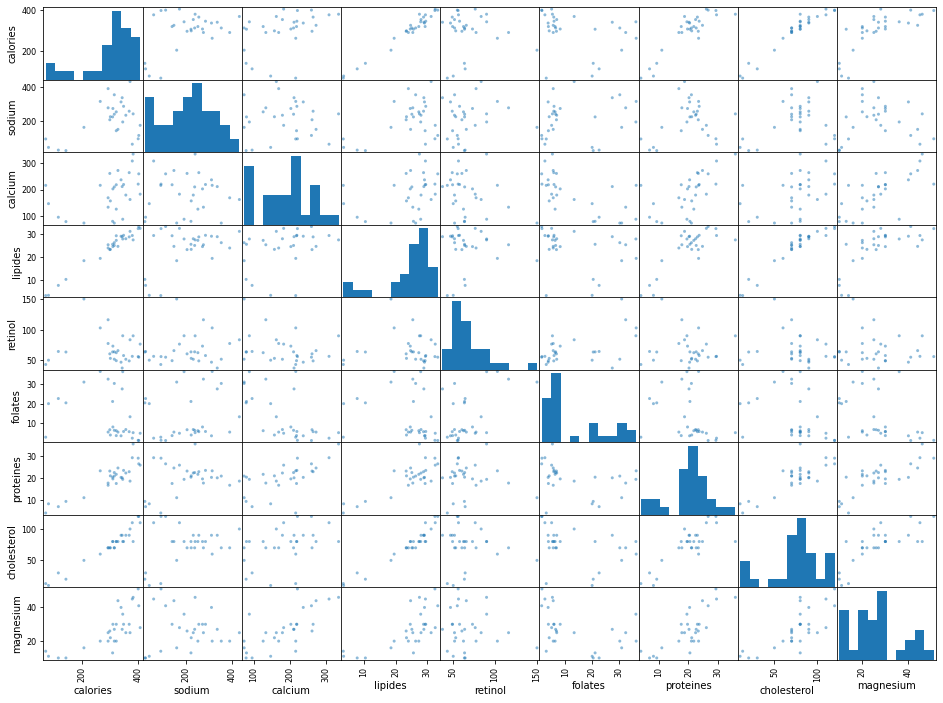

In [ ]:
pd.plotting.scatter_matrix(fromage, figsize=(16,12));


Il y a une corrélation entre plusieurs attributs.
* une corrélation positive entre les calories et cholesterol.
* une corrélation positive entre proteines et lipides.
* une corrélation positive entre les lipides et le cholesterol.
* une corrélation positive entre les proteines et le magnesium.
* une corrélation positive entre le cholesterol et le magnesium.

##Méthodes des centres mobiles

In [ ]:
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)

KMeans(n_clusters=4)

In [ ]:
def highlight(s):
    if s['Cluster #'] == 0:
        return ['background-color: #a8dadc']*2
    elif s['Cluster #'] == 1:
        return ['background-color: #e63946']*2
    elif s['Cluster #'] == 2:
        return ['background-color: #023047']*2
    elif s['Cluster #'] == 3:
        return ['background-color: #edf6f9']*2
    else:
        return ['background-color: #ffddd2']*2

In [ ]:
idk = np.argsort(kmeans.labels_)
clusters = pd.DataFrame({
    'Cluster #':kmeans.labels_[idk],
    'Fromage':fromage.index[idk]
})
clusters.style.apply(highlight, axis=1)

,Cluster #,Fromage
0,0,CarredelEst
1,0,Tome
2,0,PontlEveque
3,0,Chabichou
4,0,Chaource
5,0,Coulomniers
6,0,Fr.chevrepatemolle
7,1,Beaufort
8,1,SaintPaulin
9,1,Cheddar


###Les attributs des centres de chaque cluster

In [ ]:
print(kmeans.cluster_centers_)

[[297.85714286 239.78571429 103.84285714  24.91428571  83.92857143
   23.05714286  18.97142857  71.42857143  21.71428571]
 [363.875      146.125      257.025       29.05        63.6
    3.8625      26.5625      96.25        38.875     ]
 [101.75        44.75       133.75         6.275       55.15
   16.475        7.2         18.25        11.25      ]
 [329.8        306.6        206.82        26.87        64.24
   11.91        21.08        82.          27.4       ]]


In [ ]:
res = np.arange(9,dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters =k+2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage,km.labels_)

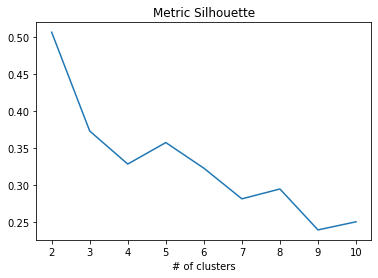

In [ ]:
plt.title("Metric Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show()

In [ ]:
#La meilleure valeur de k est celle qui maximise le coefficient de Silhouette. Dans notre cas, k=2.

##Classification ascendante hiérarchique

###SciPy

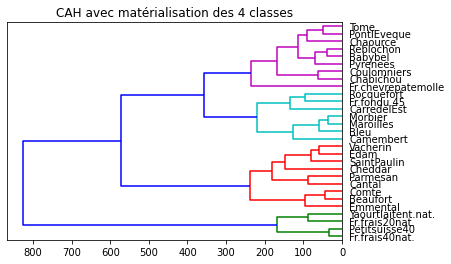

In [ ]:
Z = linkage(fromage,method='ward', metric='euclidean')
#cah et affichage du dendrogramme
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')

In [ ]:
idg = np.argsort(groupes_cah)
clusters = pd.DataFrame({
    'Cluster #':groupes_cah[idg],
    'Fromage':fromage.index[idg]
})
clusters.style.apply(highlight, axis=1)

,Cluster #,Fromage
0,1,Yaourtlaitent.nat.
1,1,Petitsuisse40
2,1,Fr.frais40nat.
3,1,Fr.frais20nat.
4,2,SaintPaulin
5,2,Beaufort
6,2,Cantal
7,2,Parmesan
8,2,Cheddar
9,2,Comte


In [ ]:
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,4,0
2,0,8,0,1
3,1,0,0,6
4,6,0,0,3


###Scikit-learn

In [ ]:
aggClustering = AgglomerativeClustering(4);
aggClustering.fit(fromage);


In [ ]:
ida = np.argsort(aggClustering.labels_)
aggClusters = pd.DataFrame({
    'Cluster #':aggClustering.labels_[idk],
    'Fromage':fromage.index[idk]
})
aggClusters.style.apply(highlight, axis=1)

,Cluster #,Fromage
0,1,CarredelEst
1,2,Tome
2,2,PontlEveque
3,2,Chabichou
4,2,Chaource
5,2,Coulomniers
6,2,Fr.chevrepatemolle
7,0,Beaufort
8,0,SaintPaulin
9,0,Cheddar


In [ ]:
pd.crosstab(groupes_cah,aggClustering.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,0,4
2,9,0,0,0
3,0,7,0,0
4,0,0,9,0


In [ ]:
#il y a certes des correspondances dans les clusters du CAH de scikit learn et de scipy

##Interprétation des classes avec PCA

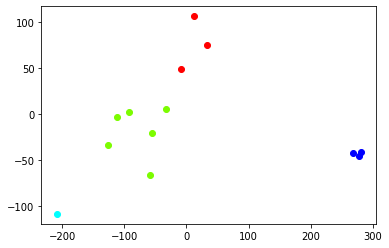

In [ ]:

acp= PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[km.labels_==k,0],acp[km.labels_==k,1],c=couleur)
plt.show()

In [ ]:
#on trouve un cluster bien éloigné qui s'agit de celui des fromages frais (en bleu électrique).
#Ceci s'explique par une grande distinction entre les valeurs nutritionnelles de ces fromages et celles des autres types.

##Divisive Clustering

In [ ]:
aggclus = cluster.AgglomerativeClustering(n_clusters = 4)
aggclus.fit(fromage)
idk = np.argsort(aggclus.labels_)
print(pd.DataFrame(fromage.index[idk],aggclus.labels_[idk]))

             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Morbier
1           Maroilles
1         Fr.fondu.45
1           Camembert
1                Bleu
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat.
